## Rainfall Prediction - Weather Forecasting


### Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(8425, 23)

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

The data types of the columns are float and object type

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

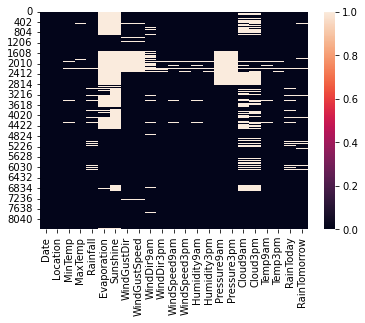

In [10]:
sns.heatmap(df.isnull())

In [14]:
zero_value = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False))
zero_value.columns=['Count of Zero values']
zero_value['% of Zero values']=zero_value['Count of Zero values']/84.25     # 8425/100 = 2.92
zero_value

,Count of Zero values,% of Zero values
Rainfall,5299,62.896142
WindSpeed9am,752,8.925816
Cloud9am,554,6.575668
Cloud3pm,347,4.118694
WindSpeed3pm,199,2.362018
Sunshine,166,1.970326
Evaporation,12,0.142433
MinTemp,4,0.047478
Humidity3pm,0,0.000000
RainToday,0,0.000000


In [11]:
# Checking for Categorical columns

catg_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catg_col.append(i)
print(catg_col)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
# Checking for Numerical Columns

num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [16]:
# Filling null values of object data column with their mode values (most frequently occurred values).

ccol=df.columns.values
for i in range(0,len(ccol)):
    if df[ccol[i]].dtype == "object":
        df[ccol[i]].fillna(df[ccol[i]].mode()[0], inplace=True)

In [17]:
# Filling null values of numerical columns with their mean values

ncol=df.columns.values
for i in range(0,len(ncol)):
    if df[ncol[i]].dtype != "object":
        df[ncol[i]].fillna(df[ncol[i]].mean(), inplace=True)

In [18]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now there are no null values present. We can even check with the heat map

<AxesSubplot:>

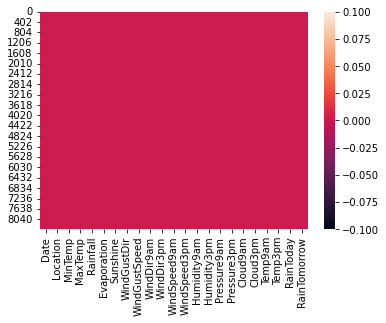

In [19]:
sns.heatmap(df.isnull())

In [20]:
for i in catg_col:
    print(i)
    print(df[i].value_counts())
    print('______________________________________________________________________')
    print('\n')

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
______________________________________________________________________


Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
______________________________________________________________________


WindGustDir
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64
______________________________________________________________________


WindDir9am
N      1735
SW      704


In [21]:
df.groupby('Location')['MaxTemp'].max()

Location
Adelaide        38.8
Albury          44.8
Brisbane        37.1
CoffsHarbour    37.7
Darwin          36.6
Melbourne       43.6
Newcastle       39.2
Penrith         44.9
PerthAirport    43.5
Uluru           30.0
Williamtown     45.5
Wollongong      40.1
Name: MaxTemp, dtype: float64

In [22]:
# Group your dataframe by location and find out the averages of all numeric values.
df.groupby('Location').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Location,,,,,,,,,,,,,,,,
Adelaide,10.980000,21.435122,1.435237,5.121671,7.632205,37.990244,11.317073,16.404878,59.029268,44.809756,1020.091220,1018.074634,4.566622,4.503183,15.861951,20.189756
Albury,10.062587,22.827453,2.129055,5.389395,7.632205,33.933951,8.248669,14.297245,72.604190,47.062845,1017.581477,1014.981477,5.285971,4.837624,14.555347,21.673539
Brisbane,15.369073,25.462280,3.109896,4.875629,7.918155,26.456341,6.031088,9.685781,66.474650,54.182210,1018.123661,1015.031731,3.694301,3.898969,20.685427,23.976141
CoffsHarbour,13.704244,23.274894,5.434707,3.700885,7.332570,38.872438,15.389027,20.512385,66.314239,60.648527,1018.587693,1016.097781,3.816694,4.116213,19.611620,21.745733
Darwin,21.324800,31.966800,2.735200,6.349558,9.389200,39.288000,16.012000,20.204000,63.828000,43.932000,1013.373200,1009.524800,3.800000,3.580000,25.601200,30.668000
Melbourne,12.443280,21.555857,2.313878,4.529963,6.419399,45.779558,19.709001,22.697904,66.754405,51.245992,1017.845623,1016.075260,5.155148,5.127789,15.332999,19.952457
Newcastle,12.937727,23.658952,3.029054,5.389395,7.632205,40.174469,5.694822,12.746831,73.754842,55.915732,1017.640233,1015.236075,4.064556,4.348869,17.433322,22.324634
Penrith,11.279668,23.378838,2.361448,5.389395,7.632205,31.413225,5.626556,11.024896,72.863071,45.481328,1017.640233,1015.236075,4.566622,4.503183,15.533195,22.135270
PerthAirport,13.172674,25.907558,1.916279,5.784460,8.797117,44.797063,18.043189,21.353821,58.833887,42.131229,1017.082508,1014.548173,3.449336,3.559801,19.330648,24.472176


### Data Visualization

In [23]:
#Checking the target column
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

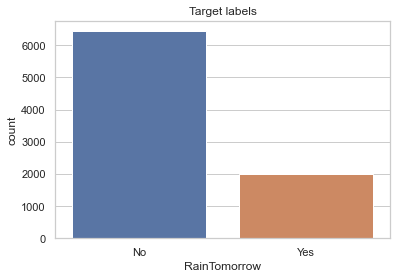

In [24]:
sns.set(style="whitegrid")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()


We will do SMOTE analysis later as the data is imbalanced

In [26]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))
print(numerical_feature)

Numerical Features Count 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [27]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete feature Count 2
Continuous feature Count 14


In [28]:
print(discrete_feature )
print('\n')
print(continuous_feature )


['Cloud9am', 'Cloud3pm']


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


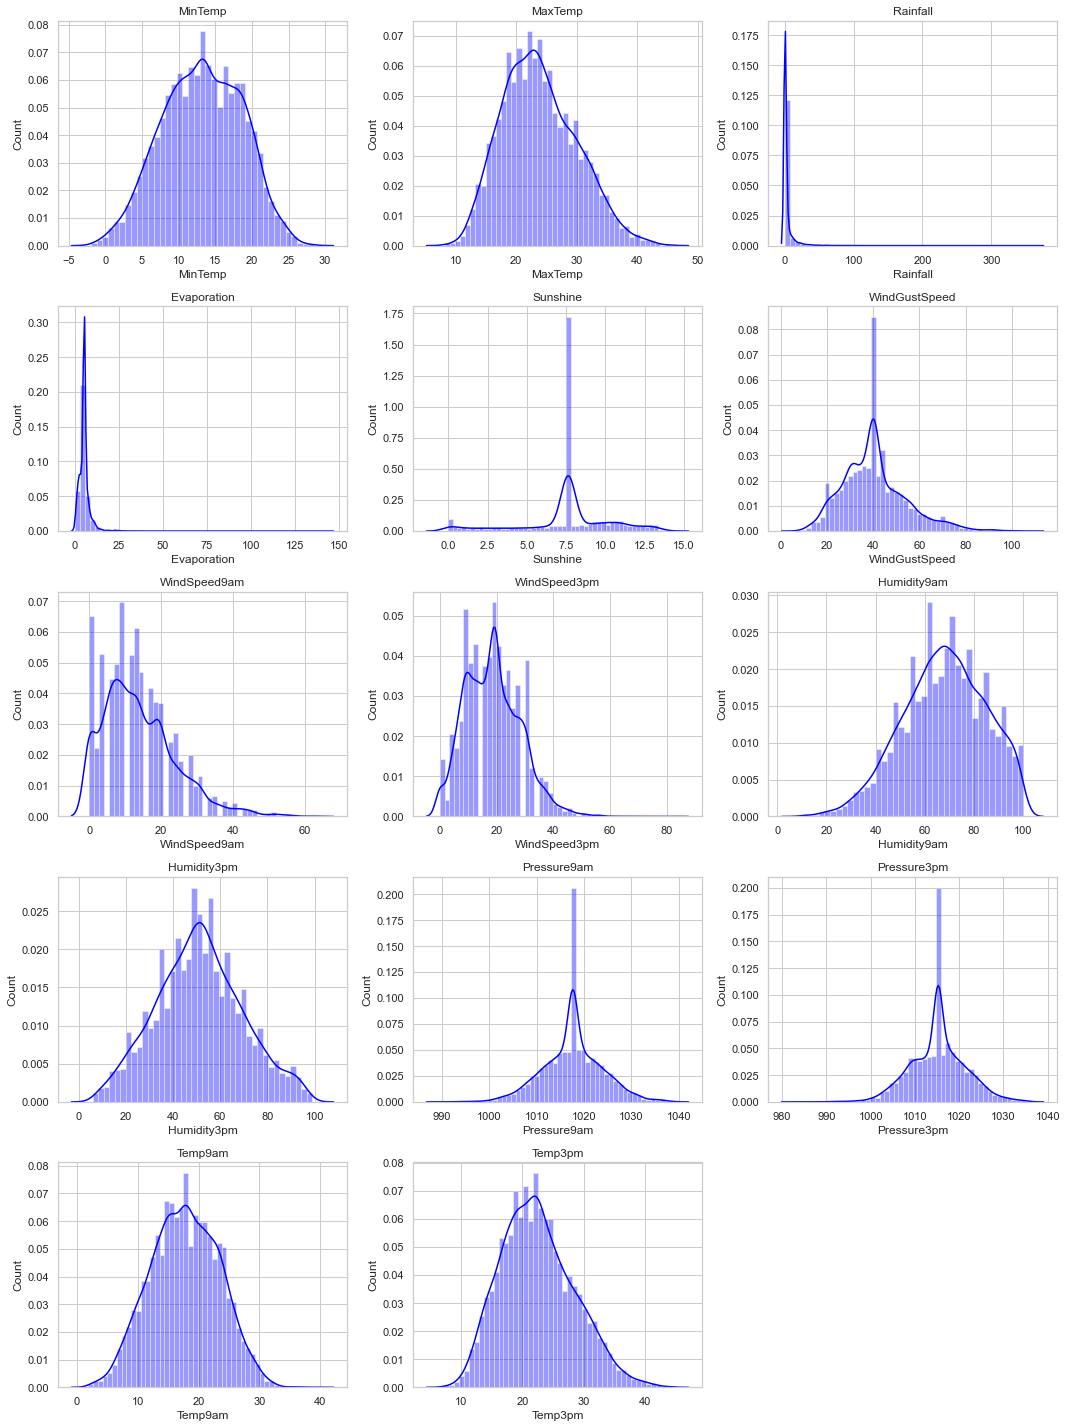

In [30]:
plt.figure(figsize=(15,20))
for i,feature in enumerate(continuous_feature):
    data=df.copy()
    plt.subplot(5,3,i+1)
    sns.distplot(df[feature],color='blue')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
plt.tight_layout()    
plt.show()

So the data is not much skewed. It is safe to proceed

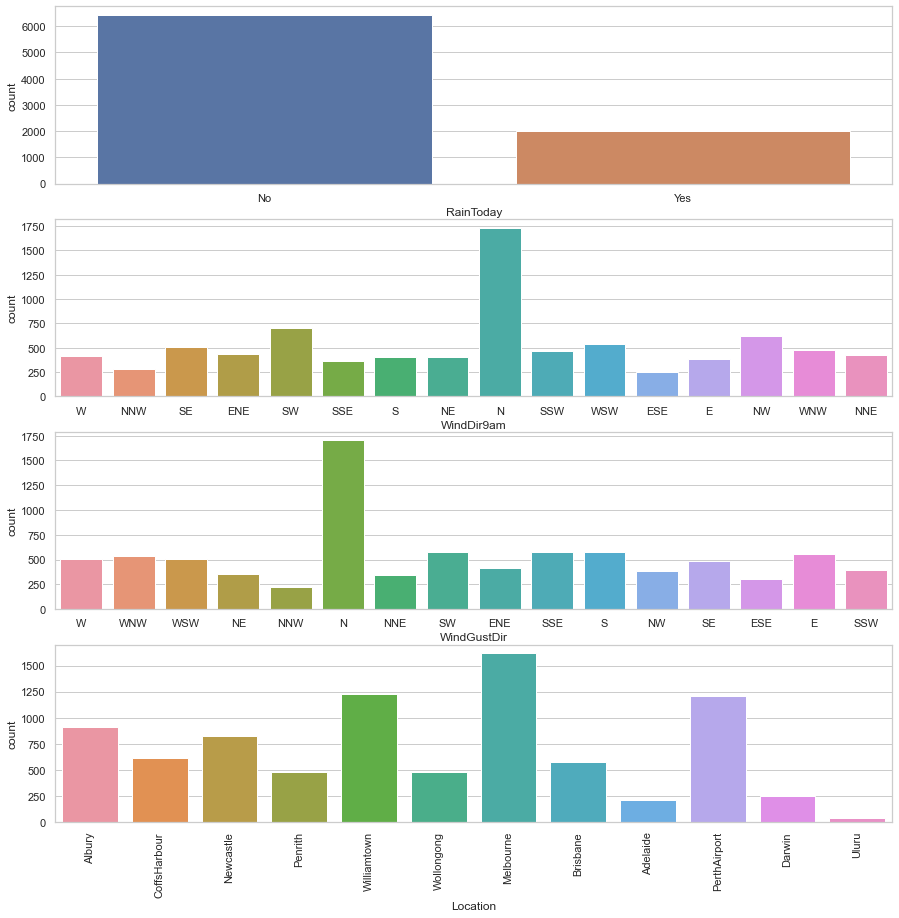

In [31]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir','Location', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
c=0
while c<=3:
    sns.countplot(df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

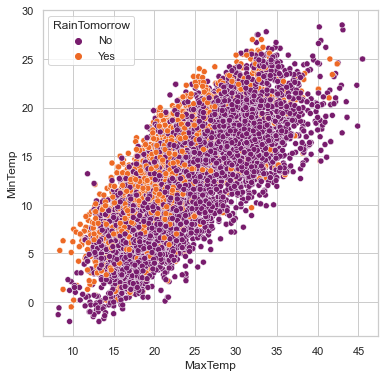

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='MaxTemp' , y='MinTemp', hue='RainTomorrow', palette='inferno', data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

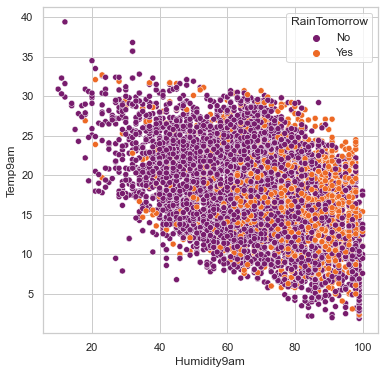

In [33]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Humidity9am' , y='Temp9am', hue='RainTomorrow', palette='inferno', data=df)

In [34]:
# Converting Date column to date, months and years
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [35]:
#adding new column day,month, year in dataframe with dt attribute
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

#Droping ['Date'] column
df.drop('Date',axis=1,inplace=True)
df.head(6)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
5,Albury,14.6,29.7,0.2,5.389395,7.632205,WNW,56.0,W,W,...,1005.4,4.566622,4.503183,20.6,28.9,No,No,6,12,2008


In [36]:
df['Year'].value_counts()

2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: Year, dtype: int64

In [37]:
df['Month'].value_counts()

6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: Month, dtype: int64

In [38]:
# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [39]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
MinTemp,1.000000,0.717522,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,0.717522,1.000000,-0.087451,0.322405,0.378403,0.139998,0.013314,0.088172,-0.390976,-0.421879,...,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886,0.015608,-0.163253,0.119772
Rainfall,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.086000,0.050631,0.024791,0.228800,0.235444,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
Evaporation,0.254965,0.322405,0.023517,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,...,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.013597,0.004362,0.152708
Sunshine,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,...,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.004662,-0.006694,0.065374
WindGustSpeed,0.230058,0.139998,0.086000,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,...,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
WindSpeed9am,0.136872,0.013314,0.050631,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,...,-0.138454,-0.000549,0.058198,0.109798,-0.002606,0.035531,0.068285,-0.003067,0.038427,-0.088489
WindSpeed3pm,0.178349,0.088172,0.024791,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,...,-0.207544,0.005061,0.003295,0.184188,0.066087,0.015268,0.053568,-0.008957,0.049483,-0.051466
Humidity9am,-0.130731,-0.390976,0.228800,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,...,0.173415,0.404742,0.296862,-0.378344,-0.382401,0.374007,0.271222,0.003799,-0.115530,0.099717
Humidity3pm,0.079048,-0.421879,0.235444,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,...,0.070369,0.424348,0.439965,-0.130414,-0.491485,0.359219,0.444808,0.012512,-0.074256,-0.028920


<AxesSubplot:>

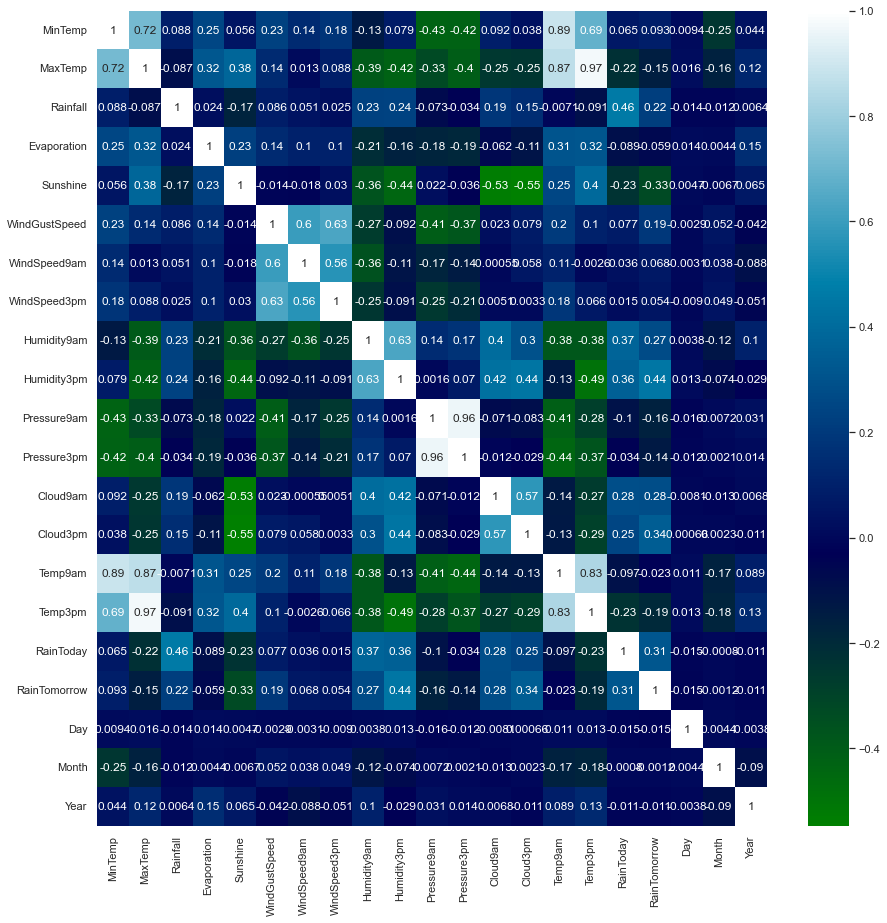

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='ocean',annot=True)

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


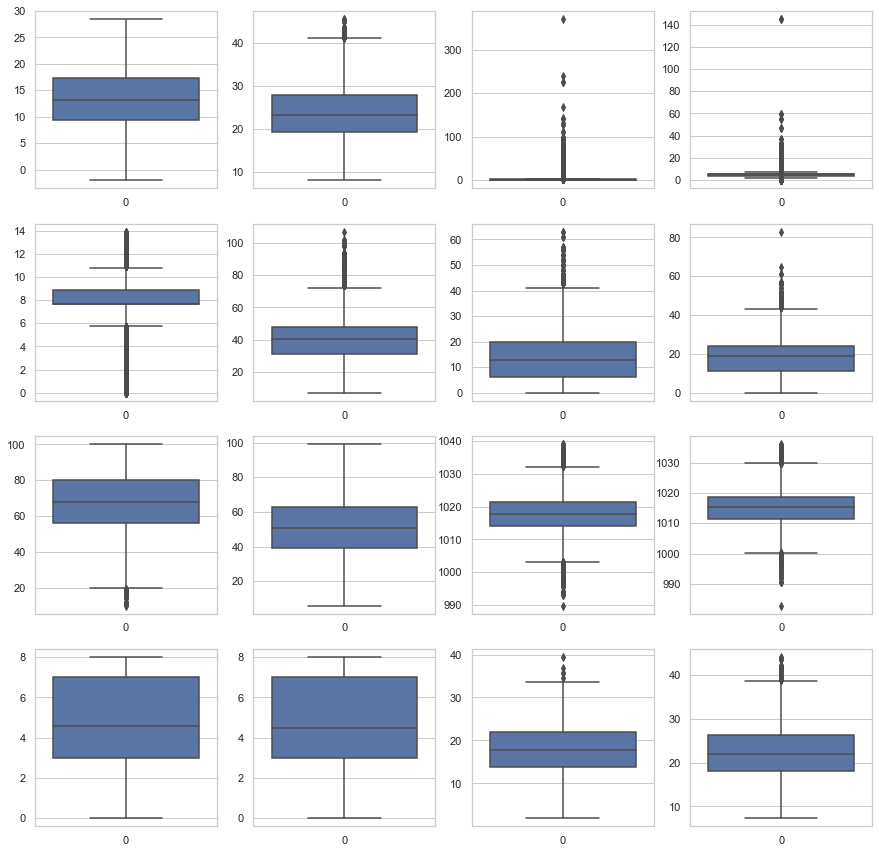

In [41]:
# Checking outliers in Numerical columns

n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
    
plt.show()

In [42]:
# Removing Outliers from Numerical Columns
def removeOutliers(numerical_feature):
    global df
    for i in range(len(numerical_feature)):
        q1 = df[numerical_feature[i]].quantile(0.25)
        q3 = df[numerical_feature[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df.loc[(df[numerical_feature[i]] <= minimum), numerical_feature[i]] = minimum
        df.loc[(df[numerical_feature[i]] >= maximum), numerical_feature[i]] = maximum  

In [43]:
removeOutliers(numerical_feature)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


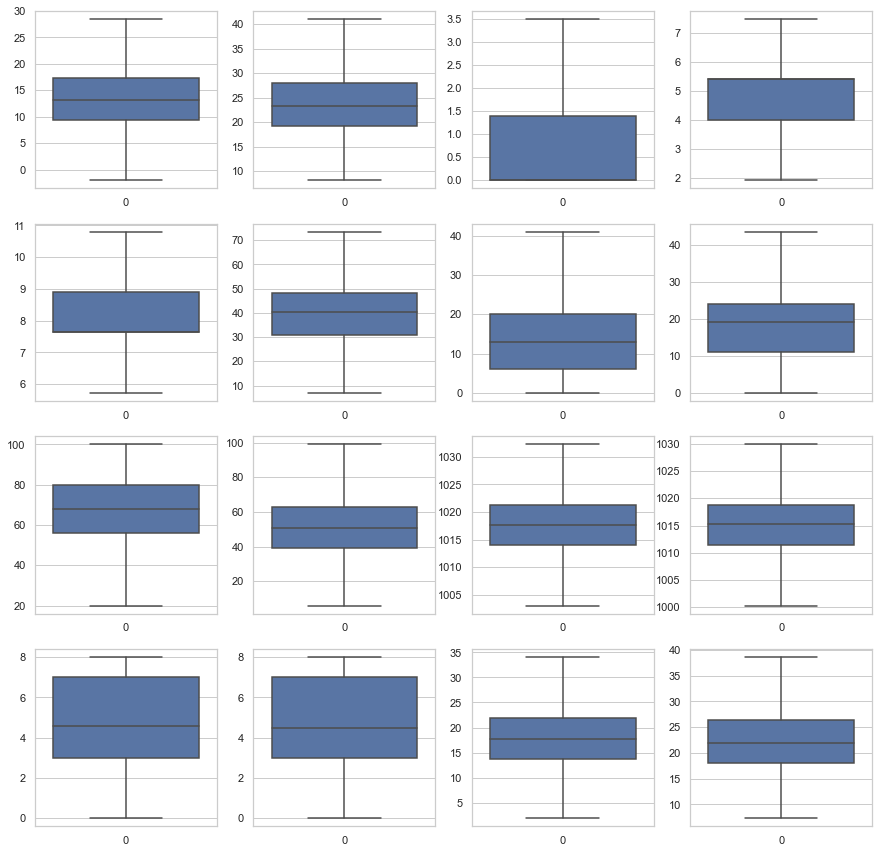

In [44]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

In [46]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [47]:
# Converting categorical columns using label encoder

WindGustDir_encode = LabelEncoder()
df['Location']=WindGustDir_encode.fit_transform(df['Location'])

WindGustDir_encode = LabelEncoder()
df['WindGustDir']=WindGustDir_encode.fit_transform(df['WindGustDir'])

WindDir9am_encode = LabelEncoder()
df['WindDir9am']=WindDir9am_encode.fit_transform(df['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
df['WindDir3pm']=WindDir3pm_encode.fit_transform(df['WindDir3pm'])

In [48]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [49]:
# Applying SMOTE to correct imbalance in target

x=df.drop('RainTomorrow', axis=1)
y=df["RainTomorrow"]
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int64

In [50]:
#Balancing data by applying SMOTE.
from imblearn.over_sampling import SMOTE
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(x,y)
print(sm_x.shape)
print(sm_y.shape)

(12868, 24)
(12868,)


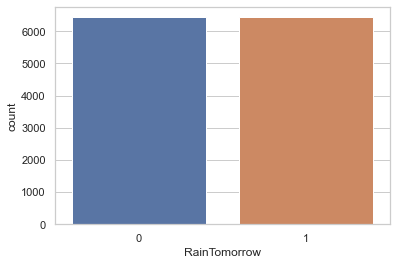

0    6434
1    6434
Name: RainTomorrow, dtype: int64


In [51]:
plt.figure(figsize=(6,4))
sns.countplot(sm_y)
plt.show()
print(sm_y.value_counts())

Since there is a lot of multicollinearity among few columns and its difficult to drop column through vif. So applying PCA to drop less important column.



In [52]:
# Applying PCA to reduce multicollinearity
# Import library to perform PCA
from sklearn.decomposition import PCA

In [53]:
# Creating instance of class to identify number of components for cumulative variance of 95%
pca = PCA(0.90)

In [54]:
X_pca=pca.fit_transform(sm_x)
X_pca.shape

(12868, 7)

In [55]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_pca.transpose())
corrmat.shape

(7, 7)

<AxesSubplot:>

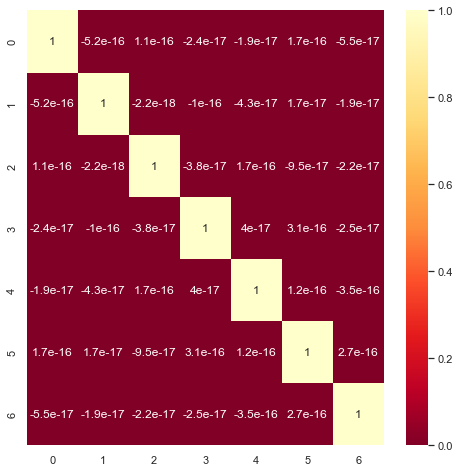

In [56]:
# Plotting heatmap to oserve the correlation between features
plt.figure(figsize=[8,8])
sns.heatmap(corrmat,cmap='YlOrRd_r', annot=True)

In [57]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_pca=scale.fit_transform(X_pca)
X_pca

array([[ 1.10923366, -0.19382788, -1.03453791, ..., -1.51903769,
         1.21491488, -2.2885396 ],
       [ 1.62740759, -0.57398833, -0.25952677, ..., -1.37227817,
         2.53506352, -0.73752237],
       [ 1.76980534,  0.12394767, -0.04717691, ..., -1.33914719,
         1.6688714 , -1.72951179],
       ...,
       [-1.61997112, -1.51274873, -1.53071081, ..., -1.32089793,
         0.36372044,  0.67700581],
       [-0.17463336,  1.14376137,  1.09282403, ...,  0.95172897,
        -0.16035531, -0.27313505],
       [-0.65205309,  0.70559357, -0.73541748, ...,  0.0289362 ,
         1.29450793,  0.47695433]])

### Model building

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
# Finding Best Random State

maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_pca,sm_y,random_state=i,test_size=0.30)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)


Best score is 0.7635327635327636 on Random State 182


In [60]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,sm_y,test_size=.30,random_state=maxRS)

In [61]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(9007, 7) 	 (3861, 7)


In [62]:
# Checking with different algorithms

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Train score",m.score(x_train,y_train))
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Train score 0.7446430554013544
Accuracy score of LogisticRegression() is:
0.7635327635327636
[[1521  443]
 [ 470 1427]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1964
           1       0.76      0.75      0.76      1897

    accuracy                           0.76      3861
   macro avg       0.76      0.76      0.76      3861
weighted avg       0.76      0.76      0.76      3861



Train score 0.7457533029865661
Accuracy score of GaussianNB() is:
0.7614607614607615
[[1542  422]
 [ 499 1398]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1964
           1       0.77      0.74      0.75      1897

    accuracy                           0.76      3861
   macro avg       0.76      0.76      0.76      3861
weighted avg       0.76      0.76      0.76      3861



Train score 0.7984900632841123
Accuracy score of SVC() is:
0.7997927997927998
[[1590  374]
 [ 399 1498]]
     

In [63]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=170,criterion='gini')
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)
print("Train score",rfc.score(x_train,y_train))
print("Test score",accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Train score 1.0
Test score 0.9085729085729086
[[1776  188]
 [ 165 1732]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1964
           1       0.90      0.91      0.91      1897

    accuracy                           0.91      3861
   macro avg       0.91      0.91      0.91      3861
weighted avg       0.91      0.91      0.91      3861



In [64]:
# Checking accuracy for Gradient Boosting Classifier
GBc = GradientBoostingClassifier()
GBc.fit(x_train,y_train)

# Prediction
predGBc = GBc.predict(x_test)
print("Train score",GBc.score(x_train,y_train))
print("Test score",accuracy_score(y_test, predGBc))
print(confusion_matrix(y_test, predGBc))
print(classification_report(y_test,predGBc))

Train score 0.7943821472188298
Test score 0.7865837865837866
[[1573  391]
 [ 433 1464]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1964
           1       0.79      0.77      0.78      1897

    accuracy                           0.79      3861
   macro avg       0.79      0.79      0.79      3861
weighted avg       0.79      0.79      0.79      3861



Here train score and test score both are having good accoracy and the variance between train and test score is almost nil. So we can Select this model.

Let's do some hyperparameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

grid = RandomizedSearchCV(GBc, para, scoring= "accuracy",cv = 5, n_iter=50,n_jobs=-1,verbose=2)

grid.fit(x_train,y_train)
print("Train score",grid.score(x_train,y_train))
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Train score 1.0
score 0.8735425688404703
best parameter {'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1}
best estimator GradientBoostingClassifier(max_depth=10, n_estimators=400)


Here also after hypertuning, train score is 1 and train score and test score variance is high. This is a case of overfitting when hypertuning is done.

so we will select GradiantBoostingClassifier as our final model.

In [66]:
best_parameter_GB = GradientBoostingClassifier(learning_rate=0.3, max_depth=10, n_estimators=400)
for i in range(2,7):
    cv = cross_val_score(GBc,X_pca,sm_y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.7189151383276344 and the SD is 0.019972023624494906
at CV 3 The mean is  0.724433911726987 and the SD is 0.04376584213027482
at CV 4 The mean is  0.7393534348772148 and the SD is 0.03605073449454696
at CV 5 The mean is  0.7482968342276543 and the SD is 0.04916478822607989
at CV 6 The mean is  0.7331477446682672 and the SD is 0.06522793003437129


In [67]:
# Cross validate of RandomForestClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(GBc,X_pca,sm_y,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Score: [0.78243978 0.69269619 0.68609169 0.77497085 0.80528566]
Mean Score: 0.7482968342276543
Standard Deviation: 0.04916478822607989


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


In [68]:
RainTomorrow =GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=400)
RainTomorrow.fit(x_train, y_train)
pred = RainTomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.38098938098939


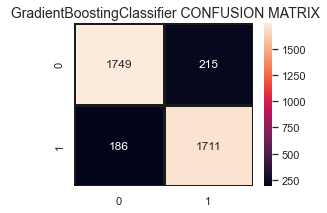

In [69]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, grid_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" GradientBoostingClassifier CONFUSION MATRIX",fontsize=14)
plt.show()

### Plotting AUC ROC Curve

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [73]:
GBc.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
y_pred_prob=GBc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.77765764, 0.93681933, 0.69840633, ..., 0.93773844, 0.56799283,
       0.92569833])

In [75]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [76]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , ..., 0.99796334, 0.99898167,
        1.        ]),
 array([0.00000000e+00, 5.27148129e-04, 1.05429626e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.97187089, 0.97187089, 0.95697033, ..., 0.02147623, 0.01791939,
        0.01492071]))

In [77]:
auc_score=roc_auc_score(y_test,GBc.predict(x_test))
print(auc_score)

0.7863306786253781


<Figure size 432x288 with 0 Axes>

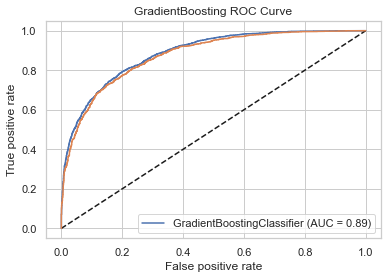

In [78]:
plt.figure(figsize=[6,4])
plot_roc_curve(GBc,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting ROC Curve')
plt.show()

### Conclusion

In [79]:
import numpy as np
a=np.array(y_test)
Predicted=np.array(predGBc)
df_com=pd.DataFrame({'Original':a,'Predicted':Predicted},index=range(len(a)))
df_com

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
3856,0,0
3857,1,1
3858,1,1
3859,1,1


So,there is a 89% chance of rain can fall on tommorow .

Where ever there will be rainfall, it will be more than 1 mm.

### Modeling Saving

In [80]:
import pickle
filename='Predicted_RainTomorrow.pkl'
pickle.dump(GBc,open(filename,'wb'))